<a href="https://colab.research.google.com/github/bominwang/Bayesian-statistics-method/blob/bayesian-model-averaging-method/DEMO_BMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**算例1：**

假设对于该物理过程，具有四个近似模型

输入X的取值范围为[1, 360]
1.   对于模型1，模型参数θ1和θ2的名义值为1.924， 0.6
2.   对于模型2，模型参数θ1和θ2的名义值为0.995， 24.65
3.   对于模型3，模型参数θ1、θ2和θ3的名义值为2.265， 364.21， 0.3
4.   对于模型4，模型参数θ1、θ2和θ3的名义值为1.541， 0.097， 0.6

试验数据集：

X = 1,7,14,21,28,90,180,270,360

Y = 0.259,0.544,0.639,0.727,0.796,1.054,1.189,1.297,1.410

In [ ]:
class Mathematical_examples_1:
  
  def func_1(x):
    return (x[:,1] * np.power(x[:,0], x[:,2])) / (10 + np.power(x[:,0], x[:,2]))
  
  def func_2(x):
    return x[:, 1] * (x[:, 0] / (x[:, 2] + x[:, 0]))
  
  def func_3(x):
    return x[:, 1] * np.power(x[:, 0] / (x[:, 0] + x[:, 2]), x[:, 3])
  
  def func_4(x):
    return x[:, 1] * (1- np.exp(- x[:, 2] * (np.power(x[:, 0], x[:, 3]))))

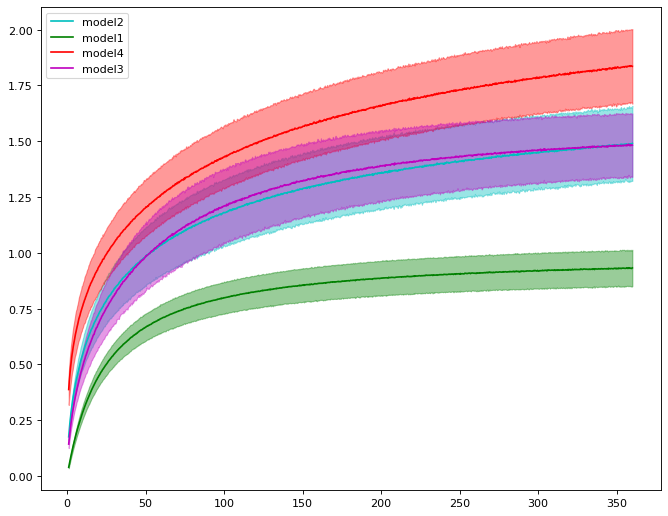

In [ ]:
x = np.linspace(1, 360, 1000).reshape(1000)
# model1
mu_y1 = []
std_y1 = []
for i in range(x.shape[0]):
  ins = x[i]
  theta1 = np.random.uniform(low = 1.924 - 0.05 * 1.925, high = 1.924 * 0.05 + 1.924, size = [1000,1])
  theta2 = np.random.uniform(low = 0.6 - 0.05 * 0.6, high = 0.6 * 0.05 + 0.6, size = [1000,1])
  input = np.concatenate((np.concatenate((ins * np.ones([1000,1]), theta1), axis = 1), theta2), axis = 1)
  y1 = Mathematical_examples_1.func_1(input)
  mu = np.mean(y1, axis = 0)
  std = np.std(y1, axis = 0)
  mu_y1.append(mu)
  std_y1.append(std)
my_y1 = np.array(mu_y1)
std_y1 = np.array(std_y1)
# model2
mu_y2 = []
std_y2 = []
for i in range(x.shape[0]):
  ins = x[i]
  theta1 = np.random.uniform(low = 0.995 - 0.05 * 0.995, high = 0.995 * 0.05 + 0.995, size = [1000,1])
  theta2 = np.random.uniform(low = 24.65 - 0.05 * 24.65, high = 25.65 * 0.05 + 24.65, size = [1000,1])
  input = np.concatenate((np.concatenate((ins * np.ones([1000,1]), theta1), axis = 1), theta2), axis = 1)
  y2 = Mathematical_examples_1.func_2(input)
  mu = np.mean(y2, axis = 0)
  std = np.std(y2, axis = 0)
  mu_y2.append(mu)
  std_y2.append(std)
mu_y2 = np.array(mu_y2)
std_y2 = np.array(std_y2)
# model3
mu_y3 = []
std_y3 = []
for i in range(x.shape[0]):
  ins = x[i]
  theta1 = np.random.uniform(low = 2.265 - 0.05 * 2.265, high = 2.265 * 0.05 + 2.265, size = [1000,1])
  theta2 = np.random.uniform(low = 364.21 - 0.05 * 364.21, high = 364.21 * 0.05 + 364.21, size = [1000,1])
  theta3 = np.random.uniform(low = 0.3 - 0.05 *  0.3, high =  0.3 * 0.05 +  0.3, size = [1000,1])
  input = np.concatenate((np.concatenate((np.concatenate((ins * np.ones([1000,1]), theta1), axis = 1), theta2), axis = 1), theta3), axis = 1)
  y3 = Mathematical_examples_1.func_3(input)
  mu = np.mean(y3, axis = 0)
  std = np.std(y3, axis = 0)
  mu_y3.append(mu)
  std_y3.append(std)
mu_y3 = np.array(mu_y3)
std_y3 = np.array(std_y3)
# model4
mu_y4 = []
std_y4 = []
for i in range(x.shape[0]):
  ins = x[i]
  theta1 = np.random.uniform(low = 1.541 - 0.05 * 1.541, high = 1.541 * 0.05 + 1.541, size = [1000,1])
  theta2 = np.random.uniform(low = 0.097 - 0.05 * 0.097, high = 0.097 * 0.05 + 0.097, size = [1000,1])
  theta3 = np.random.uniform(low = 0.6 - 0.05 *  0.6, high =  0.6 * 0.05 +  0.6, size = [1000,1])
  input = np.concatenate((np.concatenate((np.concatenate((ins * np.ones([1000,1]), theta1), axis = 1), theta2), axis = 1), theta3), axis = 1)
  y4 = Mathematical_examples_1.func_4(input)
  mu = np.mean(y4, axis = 0)
  std = np.std(y4, axis = 0)
  mu_y4.append(mu)
  std_y4.append(std)
mu_y4 = np.array(mu_y4)
std_y4 = np.array(std_y4)


plt.figure(1, figsize=(10, 8), dpi=80)
plt.plot(x, mu_y1, '-c')
plt.fill_between(x, mu_y1 - 3 * std_y1, mu_y1 + 3 * std_y1, alpha=0.4, color='c');
plt.plot(x, mu_y2, '-g')
plt.fill_between(x, mu_y2 - 3 * std_y2, mu_y2 + 3 * std_y2, alpha=0.4, color='g');
plt.plot(x, mu_y3, '-r')
plt.fill_between(x, mu_y3 - 3 * std_y3, mu_y3 + 3 * std_y3, alpha=0.4, color='r');
plt.plot(x, mu_y4, '-m')
plt.fill_between(x, mu_y4 - 3 * std_y4, mu_y4 + 3 * std_y4, alpha=0.4, color='m');
plt.legend({'model1','model2','model3','model4'})
plt.show()



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

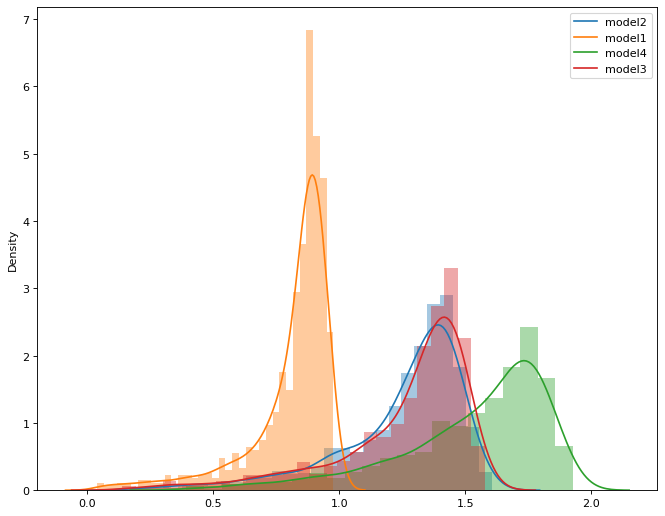

In [ ]:
x = np.linspace(1, 360, 1000).reshape(1000,1)
theta1 = np.random.uniform(low = 1.924 - 0.05 * 1.925, high = 1.924 * 0.05 + 1.924, size = [1000,1])
theta2 = np.random.uniform(low = 0.6 - 0.05 * 0.6, high = 0.6 * 0.05 + 0.6, size = [1000,1])
input = np.concatenate((np.concatenate((x, theta1), axis = 1), theta2), axis = 1)
y1 = Mathematical_examples_1.func_1(input)

theta1 = np.random.uniform(low = 0.995 - 0.05 * 0.995, high = 0.995 * 0.05 + 0.995, size = [1000,1])
theta2 = np.random.uniform(low = 24.65 - 0.05 * 24.65, high = 25.65 * 0.05 + 24.65, size = [1000,1])
input = np.concatenate((np.concatenate((x, theta1), axis = 1), theta2), axis = 1)
y2 = Mathematical_examples_1.func_2(input)

theta1 = np.random.uniform(low = 2.265 - 0.05 * 2.265, high = 2.265 * 0.05 + 2.265, size = [1000,1])
theta2 = np.random.uniform(low = 364.21 - 0.05 * 364.21, high = 364.21 * 0.05 + 364.21, size = [1000,1])
theta3 = np.random.uniform(low = 0.3 - 0.05 *  0.3, high =  0.3 * 0.05 +  0.3, size = [1000,1])
input = np.concatenate((np.concatenate((np.concatenate((x, theta1), axis = 1), theta2), axis = 1), theta3), axis = 1)
y3 = Mathematical_examples_1.func_3(input)

theta1 = np.random.uniform(low = 1.541 - 0.05 * 1.541, high = 1.541 * 0.05 + 1.541, size = [1000,1])
theta2 = np.random.uniform(low = 0.097 - 0.05 * 0.097, high = 0.097 * 0.05 + 0.097, size = [1000,1])
theta3 = np.random.uniform(low = 0.6 - 0.05 *  0.6, high =  0.6 * 0.05 +  0.6, size = [1000,1])
input = np.concatenate((np.concatenate((np.concatenate((x, theta1), axis = 1), theta2), axis = 1), theta3), axis = 1)
y4 = Mathematical_examples_1.func_4(input)

plt.figure(2,figsize=(10, 8), dpi=80)
# 本次需求的核心代码，seaborn.distplot()用于绘制直方图、概率密度/核密度曲线、拟合曲线。
# hist=True/False，是否绘制直方图，可以添加hist_kws={}，进行详细设置，不在需求内，不赘述；
# kde=True/False，是否绘制核密度曲线，可以添加kde_kws={},进行详细设置，实际使用时，概率密度曲线常使用拟合曲线表示，不赘述；
# fit_kws={'color':'拟合曲线颜色','label':'图例说明','linestyle':'曲线样式'}
sns.distplot(y1, hist=True, kde = True, fit_kws={'color':'c', 'label':'model1','linestyle':'-'})
sns.distplot(y2, hist=True, kde = True, fit_kws={'color':'g', 'label':'model2','linestyle':'-'})
sns.distplot(y3, hist=True, kde = True, fit_kws={'color':'r', 'label':'model3','linestyle':'-'})
sns.distplot(y4, hist=True, kde = True, fit_kws={'color':'m', 'label':'model4','linestyle':'-'})
plt.legend({"model1","model2",'model3','model4'})
plt.show()

**算例2：**

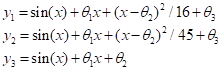

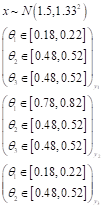

In [ ]:
class Mathematical_examples_2:

  def func_1(x):
    return np.sin(x[:, 0]) + np.multiply(x[:, 1], np.power(x[:, 0] - 0.5, 2) / 16) + x[:, 2]
  
  def func_2(x):
    return np.sin(x[:, 0]) + np.multiply(x[:, 1], x[:, 0]) + np.power(x[:, 0] - x[:, 2], 2) / 65 + x[:, 3]
  
  def func_3(x):
    return np.sin(x[:, 0]) + np.multiply(x[:, 1], x[:, 0]) + x[:, 2]

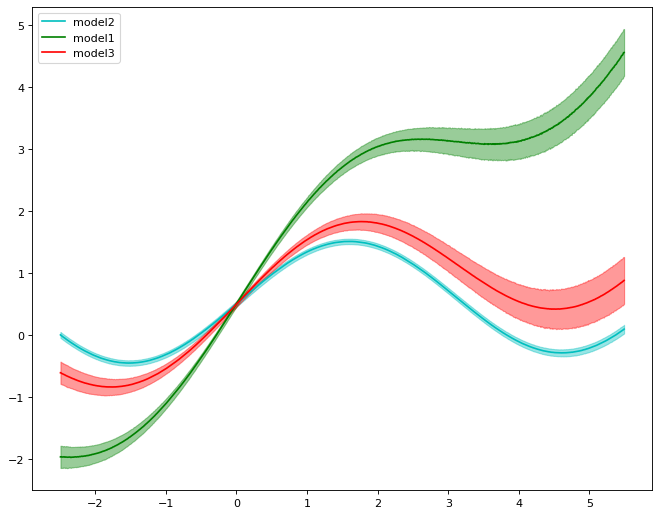

In [ ]:
x = np.linspace(1.5 - 3 * 1.33, 1.5 + 3 * 1.33, 1000).reshape(1000,1)
# model1
mu_y1 = []
std_y1 = []
for i in range(x.shape[0]):
  ins = x[i,:]
  theta1 = np.random.uniform(low = 0.2 - 0.1 * 0.2, high = 0.2 * 0.1 + 0.2, size = [1000,1])
  theta2 = np.random.uniform(low = 0.5 - 0.05 * 0.5, high = 0.5 * 0.05 + 0.5, size = [1000,1])
  theta3 = np.random.uniform(low = 0.5 - 0.05 * 0.5, high = 0.5 * 0.05 + 0.5, size = [1000,1])
  input = np.concatenate((np.concatenate((np.concatenate((ins * np.ones([1000,1]), theta1), axis = 1), theta2), axis = 1), theta3), axis = 1)
  y1 = Mathematical_examples_2.func_1(input)
  mu = np.mean(y1, axis = 0)
  std = np.std(y1, axis = 0)
  mu_y1.append(mu)
  std_y1.append(std)
my_y1 = np.array(mu_y1)
std_y1 = np.array(std_y1)

# model2
mu_y2 = []
std_y2 = []
for i in range(x.shape[0]):
  ins = x[i,:]
  theta1 = np.random.uniform(low = 0.8 - 0.05 * 0.8, high = 0.8 * 0.05 + 0.8, size = [1000,1])
  theta2 = np.random.uniform(low = 0.5 - 0.05 * 0.5, high = 0.5 * 0.05 + 0.5, size = [1000,1])
  theta3 = np.random.uniform(low = 0.5 - 0.05 * 0.5, high = 0.5 * 0.05 + 0.5, size = [1000,1])
  input = np.concatenate((np.concatenate((np.concatenate((ins * np.ones([1000,1]), theta1), axis = 1), theta2), axis = 1), theta3), axis = 1)
  y2 = Mathematical_examples_2.func_2(input)
  mu = np.mean(y2, axis = 0)
  std = np.std(y2, axis = 0)
  mu_y2.append(mu)
  std_y2.append(std)
my_y2 = np.array(mu_y2)
std_y2 = np.array(std_y2)

# model3
mu_y3 = []
std_y3 = []
for i in range(x.shape[0]):
  ins = x[i,:]
  theta1 = np.random.uniform(low = 0.2 - 0.05 * 0.2, high = 0.2 * 0.05 + 0.2, size = [1000,1])
  theta2 = np.random.uniform(low = 0.5 - 0.05 * 0.5, high = 0.5 * 0.05 + 0.5, size = [1000,1])
  input = np.concatenate((np.concatenate((ins * np.ones([1000,1]), theta1), axis = 1), theta2), axis = 1)
  y3 = Mathematical_examples_2.func_3(input)
  mu = np.mean(y3, axis = 0)
  std = np.std(y3, axis = 0)
  mu_y3.append(mu)
  std_y3.append(std)
my_y3 = np.array(mu_y2)
std_y3 = np.array(std_y2)

plt.figure(3, figsize=(10, 8), dpi=80)
plt.plot(x, mu_y1, '-c')
plt.fill_between(x.reshape(1000), mu_y1 - 3 * std_y1, mu_y1 + 3 * std_y1, alpha=0.4, color='c');
plt.plot(x, mu_y2, '-g')
plt.fill_between(x.reshape(1000), mu_y2 - 3 * std_y2, mu_y2 + 3 * std_y2, alpha=0.4, color='g');
plt.plot(x, mu_y3, '-r')
plt.fill_between(x.reshape(1000), mu_y3 - 3 * std_y3, mu_y3 + 3 * std_y3, alpha=0.4, color='r');
plt.legend({'model1','model2','model3'})
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

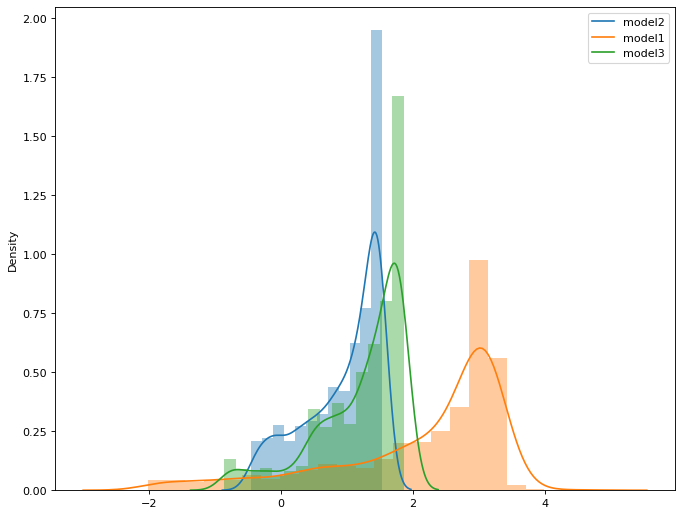

In [ ]:
x = np.random.normal(loc = 1.5, scale = 1.33, size = [1000,1])
# model1
theta1 = np.random.uniform(low = 0.2 - 0.1 * 0.2, high = 0.2 * 0.1 + 0.2, size = [1000,1])
theta2 = np.random.uniform(low = 0.5 - 0.05 * 0.5, high = 0.5 * 0.05 + 0.5, size = [1000,1])
theta3 = np.random.uniform(low = 0.5 - 0.05 * 0.5, high = 0.5 * 0.05 + 0.5, size = [1000,1])
input = np.concatenate((np.concatenate((np.concatenate((x, theta1), axis = 1), theta2), axis = 1), theta3), axis = 1)
y1 = Mathematical_examples_2.func_1(input)
# model2
theta1 = np.random.uniform(low = 0.8 - 0.05 * 0.8, high = 0.8 * 0.05 + 0.8, size = [1000,1])
theta2 = np.random.uniform(low = 0.5 - 0.05 * 0.5, high = 0.5 * 0.05 + 0.5, size = [1000,1])
theta3 = np.random.uniform(low = 0.5 - 0.05 * 0.5, high = 0.5 * 0.05 + 0.5, size = [1000,1])
input = np.concatenate((np.concatenate((np.concatenate((x, theta1), axis = 1), theta2), axis = 1), theta3), axis = 1)
y2 = Mathematical_examples_2.func_2(input)
# model3
theta1 = np.random.uniform(low = 0.2 - 0.05 * 0.2, high = 0.2 * 0.05 + 0.2, size = [1000,1])
theta2 = np.random.uniform(low = 0.5 - 0.05 * 0.5, high = 0.5 * 0.05 + 0.5, size = [1000,1])
input = np.concatenate((np.concatenate((x, theta1), axis = 1), theta2), axis = 1)
y3 = Mathematical_examples_2.func_3(input)

# figure
plt.figure(4,figsize=(10, 8), dpi=80)
# 本次需求的核心代码，seaborn.distplot()用于绘制直方图、概率密度/核密度曲线、拟合曲线。
# hist=True/False，是否绘制直方图，可以添加hist_kws={}，进行详细设置，不在需求内，不赘述；
# kde=True/False，是否绘制核密度曲线，可以添加kde_kws={},进行详细设置，实际使用时，概率密度曲线常使用拟合曲线表示，不赘述；
# fit_kws={'color':'拟合曲线颜色','label':'图例说明','linestyle':'曲线样式'}
sns.distplot(y1, hist=True, kde = True, fit_kws={'color':'c', 'label':'model1','linestyle':'-'})
sns.distplot(y2, hist=True, kde = True, fit_kws={'color':'g', 'label':'model2','linestyle':'-'})
sns.distplot(y3, hist=True, kde = True, fit_kws={'color':'r', 'label':'model3','linestyle':'-'})
plt.legend({"model1","model2",'model3'})
plt.show()

**算例3**

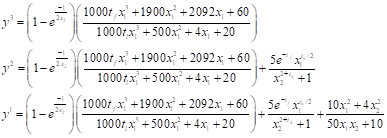

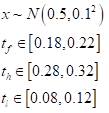

In [178]:
class Mathematical_examples_3:
  def __init__(self):
    pass
  # x = [x1, x2, tf, th, tl]
  def func_1(self, x):
    a = 1 - np.exp(np.power(2 * x[:,1], -1))
    b = np.multiply((1000 * x[:, 2]), np.power(x[:, 0], 3)) + 1900 * np.power(x[:, 0], 2) + 2092 * x[:, 0] + 60
    c = np.power(x[:, 0], 3) + 500 * np.power(x[:, 0], 2) + 4 * x[:, 0] + 20
    d = np.multiply(a, b/c)
    return d

  def func_2(self, x):
    return self.func_1(x) - (np.multiply(5 * np.exp(- x[:, 2]), np.power(x[:, 0], x[:, 3] / 2)) / (np.power(x[:, 1], 2 + x[:, 3]) + 1))
  
  def func_3(self, x):
    return self.func_2(x) + (50 * np.power(x[:, 0], 2) + 10 * np.power(x[:, 1], 2)) / (50 * np.multiply(x[:, 0], x[:, 1]))
    

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

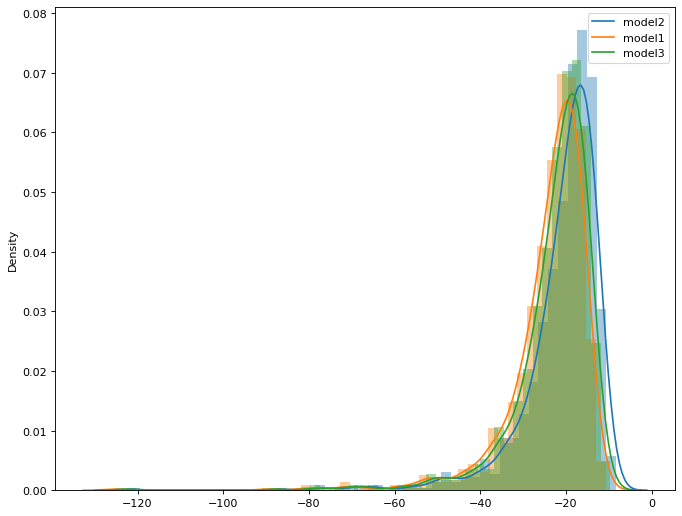

In [179]:
x = np.random.normal(loc = 0.5, scale = 0.1, size = [1000, 2])

theta1 = np.random.uniform(low = 0.18 - 0.05 * 0.18, high = 0.18 * 0.05 + 0.18, size = [1000,1])
theta2 = np.random.uniform(low = 0.28 - 0.05 * 0.28, high = 0.28 * 0.05 + 0.28, size = [1000,1])
theta3 = np.random.uniform(low = 0.08 - 0.05 * 0.08, high = 0.08 * 0.05 + 0.08, size = [1000,1])
input = np.concatenate((np.concatenate((np.concatenate((x, theta1), axis = 1), theta2), axis = 1), theta3), axis = 1)

y1 = Mathematical_examples_3().func_1(input)
y2 = Mathematical_examples_3().func_2(input)
y3 = Mathematical_examples_3().func_3(input)
# figure
plt.figure(4,figsize=(10, 8), dpi=80)
sns.distplot(y1, hist=True, kde = True, fit_kws={'color':'c', 'label':'model1','linestyle':'-'})
sns.distplot(y2, hist=True, kde = True, fit_kws={'color':'g', 'label':'model2','linestyle':'-'})
sns.distplot(y3, hist=True, kde = True, fit_kws={'color':'r', 'label':'model3','linestyle':'-'})
plt.legend({"model1","model2",'model3'})
plt.show()

**算例4**

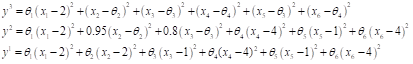

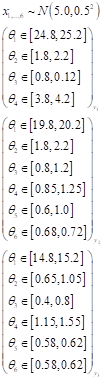

In [195]:
class Mathematical_examples_4:
# x = [x1, x2, x3, x4, x5, x6, theta1, theta2, theta3, theta4, theta5, theta6]
#     0  1  2  3  4  5   6    7    8   9     10    11
  def func_1(x):
    return np.multiply(x[:, 6], np.power(x[:, 0]-2, 2)) 
    + np.power(x[:, 1] - x[:, 7], 2) 
    + np.power(x[:, 2] - x[:, 8], 2) 
    + np.power(x[:, 3] - x[:, 9], 2) 
    + np.power(x[:, 4] - x[:, 8], 2) 
    + np.power(x[:, 5] - x[:, 9], 2)

  def func_2(x):
    return np.multiply(x[:, 6], np.power(x[:, 0]-2, 2)) 
    + 0.95 * np.power(x[:, 1] - x[:, 7], 2) 
    + 0.8 * np.power(x[:, 2] - x[:, 8], 2) 
    + np.multiply(x[:, 9], np.power(x[:, 3] - 4, 2)) 
    + np.multiply(x[:, 10], np.power(x[:, 4] - 1, 2)) 
    + np.multiply(x[:, 11], np.power(x[:,5]- x[:, 9], 2))
  
  def func_3(x):
    return np.multiply(x[:, 6], np.power(x[:, 0] - 2, 2)) 
    + np.multiply(x[:, 7], np.power(x[:, 1] - 2, 2)) 
    + np.multiply(x[:, 8], np.power(x[:, 2] - 1, 2)) 
    + np.multiply(x[:, 9], np.power(x[:, 3] - 4, 2)) 
    + np.multiply(x[:, 10], np.power(x[:, 4] - 1, 2)) 
    + np.multiply(x[:, 11], np.power(x[:,5]- 4, 2))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

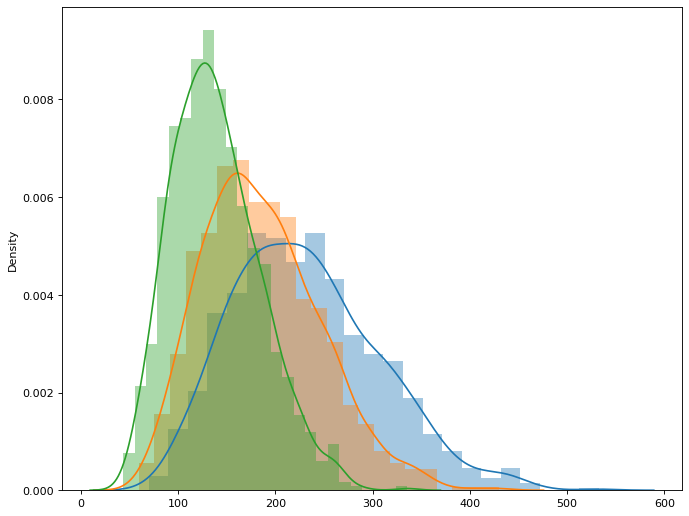

In [196]:
x = np.random.normal(loc = 5, scale = 0.5, size = [1000, 6])

theta1 = np.random.uniform(low = 25 - 0.05 * 25, high = 25 * 0.05 + 25, size = [1000,1])
theta2 = np.random.uniform(low = 2 - 0.05 * 2, high = 2 * 0.05 + 2, size = [1000,1])
theta3 = np.random.uniform(low = 1 - 0.05 * 1, high = 1 * 0.05 + 1, size = [1000,1])
theta4 = np.random.uniform(low = 4 - 0.05 * 4, high = 4 * 0.05 + 4, size = [1000,1])
input = np.concatenate((x, theta1, theta2, theta3, theta4), axis = 1)
y1 = Mathematical_examples_4.func_1(input)

theta1 = np.random.uniform(low = 20 - 0.05 * 20, high = 20 * 0.05 + 20, size = [1000,1])
theta2 = np.random.uniform(low = 2 - 0.05 * 2, high = 2 * 0.05 + 2, size = [1000,1])
theta3 = np.random.uniform(low = 1 - 0.05 * 1, high = 1 * 0.05 + 1, size = [1000,1])
theta4 = np.random.uniform(low = 1.1 - 0.05 * 1.1, high = 1.1 * 0.05 + 1.1, size = [1000,1])
theta5 = np.random.uniform(low = 0.8 - 0.05 * 0.8, high = 0.8 * 0.05 + 0.8, size = [1000,1])
theta6 = np.random.uniform(low = 0.7 - 0.05 * 0.7, high = 0.7 * 0.05 + 0.7, size = [1000,1])
input = np.concatenate((x, theta1, theta2, theta3, theta4, theta5, theta6), axis = 1)
y2 = Mathematical_examples_4.func_2(input)

theta1 = np.random.uniform(low = 15 - 0.05 * 15, high = 15 * 0.05 + 15, size = [1000,1])
theta2 = np.random.uniform(low = 0.85 - 0.05 * 0.85, high = 0.85 * 0.05 + 0.85, size = [1000,1])
theta3 = np.random.uniform(low = 0.6 - 0.05 * 0.6, high = 0.6 * 0.05 + 0.6, size = [1000,1])
theta4 = np.random.uniform(low = 1.25 - 0.05 * 1.25, high = 1.25 * 0.05 + 1.25, size = [1000,1])
theta5 = np.random.uniform(low = 0.78 - 0.05 * 0.78, high = 0.78 * 0.05 + 0.78, size = [1000,1])
theta6 = np.random.uniform(low = 0.78 - 0.05 * 0.78, high = 0.78 * 0.05 + 0.78, size = [1000,1])
input = np.concatenate((x, theta1, theta2, theta3, theta4, theta5, theta6), axis = 1)
y3 = Mathematical_examples_4.func_3(input)

plt.figure(5, figsize = (10, 8), dpi = 80)
sns.distplot(y1, hist=True, kde = True, fit_kws={'color':'c', 'label':'model1','linestyle':'-'})
sns.distplot(y2, hist=True, kde = True, fit_kws={'color':'b', 'label':'model1','linestyle':'-'})
sns.distplot(y3, hist=True, kde = True, fit_kws={'color':'r', 'label':'model1','linestyle':'-'})